In [11]:
import pandas as pd
import numpy as np
import os

In [175]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [18]:
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt

In [8]:
import scripts.QC.GT_matrices as QC

In [9]:
import scripts.downstream_formatting as df

In [219]:
!ls ../../str2qtl_out/F2

F2_empty_files
F2_empty_genotypes.txt
F2_gt_matrix_ws100_FilteredForBinsize1000000.csv
F2_gt_matrix_ws100_FilteredForBinsize1000000_FilteredForXO3.csv
F2_gt_matrix_ws200_FilteredForBinsize1000000.csv
F2_gt_matrix_ws200_FilteredForBinsize1000000_FilteredForXO3.csv
F2_gt_matrix_ws500_FilteredForBinsize1000000.csv
F2_gt_matrix_ws500_FilteredForBinsize1000000_FilteredForXO3.csv
F2_gt_matrix_ws50_FilteredForBinsize1000000.csv
F2_gt_matrix_ws50_FilteredForBinsize1000000_FilteredForXO3.csv
F2_rqtl_genotypes_ws100_FilteredForBinsize1000000_FilteredForXO3removedAmb0.2.csv
F2_rqtl_genotypes_ws200_FilteredForBinsize1000000_FilteredForXO3removedAmb0.2.csv
F2_rqtl_genotypes_ws500_FilteredForBinsize1000000_FilteredForXO3removedAmb0.2.csv
F2_rqtl_genotypes_ws50_FilteredForBinsize1000000_FilteredForXO3removedAmb0.2.csv
F2_rqtl_phenotypes_ws100_FilteredForBinsize_FilteredForXO3removedAmb0.2.csv
F2_rqtl_phenotypes_ws200_FilteredForBinsize_FilteredForXO3removedAmb0.2.csv
F2_rqtl_phenotypes_ws500_Filtered

In [220]:
path = "../../str2qtl_out/F2"
binsize=1000000

In [221]:
ws_mt_dict = {}
for i in os.listdir(path):
    if i.endswith("Binsize{}.csv".format(str(binsize))):
        ws = i.split("_")[3].lstrip("ws")
        ws_mt_dict[ws] = pd.read_csv(os.path.join(path,i))
        ws_mt_dict[ws].index = ws_mt_dict[ws]["Unnamed: 0"].astype(str)
        del(ws_mt_dict[ws]["Unnamed: 0"])
    
## make sure there are no missing columns
cols = list(set.union(*[set(item.columns) for key, item in ws_mt_dict.items()]))
for key, item in ws_mt_dict.items():
    #print(list(item.index))
    for c in cols:
        if c in list(item.columns):
            pass
        else:
            item[c]=np.nan
    #print(item.shape)

In [222]:
ws_mt_dict.keys()

dict_keys(['50', '100', '200', '500'])

In [224]:
ws_mt_dict["200"]

,1-1,1-2,1-3,1-4,1-5,1-6,1-7,1-8,1-9,1-10,...,2-141,2-142,2-143,2-144,2-145,2-146,2-147,2-148,2-149,2-150
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
100002,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.818182,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
100302,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,-1.0
100502,0.810606,0.000000,0.000000,0.000000,0.000000,0.0,-0.153846,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0
100602,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.0,1.0,1.000000,1.000000,NaN,1.000000,1.0,1.0
100902,0.835938,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0,1.000000,1.0,1.0
101002,-1.000000,0.443850,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
101202,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.000000,-1.0,-1.0
101302,-1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.882353,1.0,1.0,1.000000,1.000000,NaN,0.000000,0.0,0.0
101502,0.000000,-0.977143,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [204]:
 C = [set(["A","B"]), set(["C", "A"])]

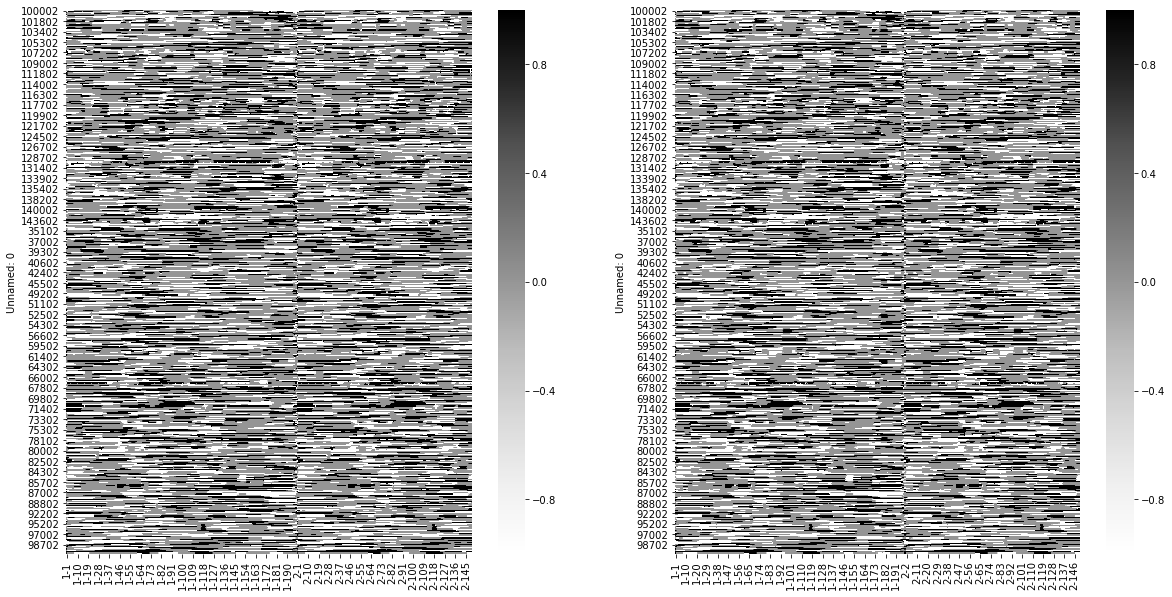

In [108]:
fig, (ax,ax1) = plt.subplots(ncols=2, nrows=1, figsize=(20,10))
sns.heatmap(ws_mt_dict["200"], ax=ax, cmap="Greys")
sns.heatmap(ws_mt_dict["50"], ax=ax1, cmap="Greys")

plt.show()

In [22]:
np.max(np.max(ws_mt_dict["100"]))

147002.0

In [26]:
#ws_mt_dict["100"]

In [27]:
ws_mt_dict["100"].index = ws_mt_dict["100"]["Unnamed: 0"]

In [28]:
del(ws_mt_dict["100"]["Unnamed: 0"])

In [35]:
ws_mt_dict["100"].shape

(519, 348)

In [36]:
ws_mt_dict["50"].shape

(519, 347)

In [ ]:
#scipy.stats.pearsonr(

In [83]:
ws_mt_dict["100"].sum().sum()

-1723.1551227185614

In [84]:
ws_mt_dict["50"].sum().sum()

-1213.9971571316428

In [123]:
ws_mt_dict.keys()

dict_keys(['50', '100', '200'])

In [120]:
A_min_B = []
for i, k in ws_mt_dict["100"].iterrows():
        A = ws_mt_dict["100"].loc[i]
        B = ws_mt_dict["50"].loc[i]
        C = A-B
        A_min_B.append(C)
        
    

In [138]:
ws_50_200_diff = ws_mt_dict["200"]-ws_mt_dict["50"]

In [139]:
abs_diff = ws_50_200_diff.abs()

In [164]:
abs_dif_per_indiv = abs_diff.mean(axis=1)

In [167]:
abs_dif_per_indiv

Unnamed: 0
100002    0.005537
100302    0.077386
100502    0.060699
100602    0.026685
100902    0.019129
            ...   
99102     0.000712
99302     0.003678
99502     0.000440
99702     0.004805
99802     0.005950
Length: 519, dtype: float64

In [168]:
abs_dif_per_bin = abs_diff.mean(axis=0)

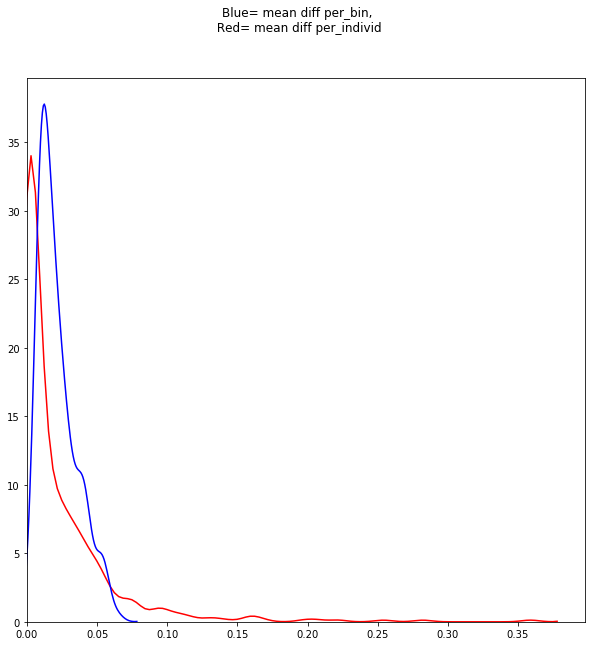

In [170]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))
sns.kdeplot(abs_dif_per_indiv, ax=ax,legend="per_individual", color="Red")
sns.kdeplot(abs_dif_per_bin, ax=ax, legend="per_bin", color="Blue")

plt.suptitle("Blue= mean diff per_bin,\n Red= mean diff per_individ")
ax.set_xlim(0,)


plt.show()

In [121]:
AB_df = pd.DataFrame(A_min_B)

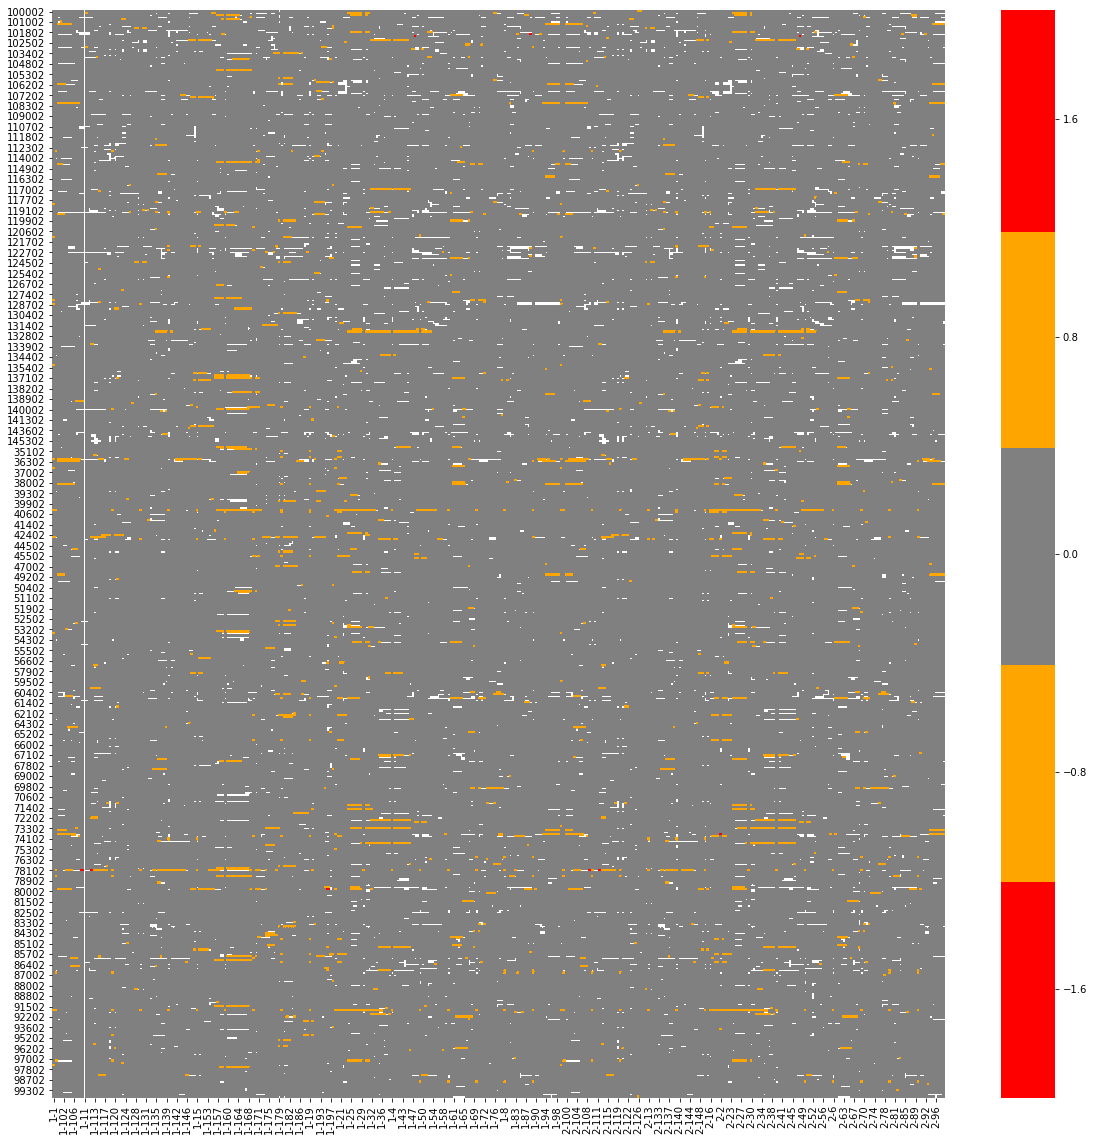

In [122]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(20,20))
sns.heatmap(AB_df, cmap=["Red", "Orange", "Grey","Orange","Red"], center=0, ax=ax, vmax=2, vmin=-2)
plt.show()

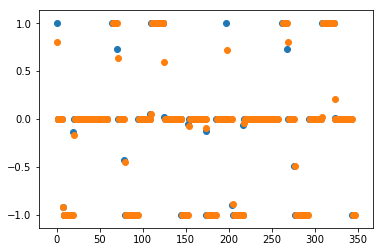

In [97]:
plt.scatter(range(len(A)),B)
plt.scatter(range(len(A)),A)


-31.556556548955314

In [42]:
ws_mt_dict["100"].shape

(519, 348)

In [43]:
ws_mt_dict["50"].shape

(519, 347)

In [50]:
len(set.union(set(ws_mt_dict["100"].columns), set(ws_mt_dict["50"].columns)))

348

In [45]:
ws_mt_dict["100"][ws_mt_dict["50"].columns]

,1-1,1-2,1-3,1-4,1-5,1-6,1-7,1-8,1-9,1-10,...,2-141,2-142,2-143,2-144,2-145,2-146,2-147,2-148,2-149,2-150
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
100002,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-0.750000,0.00000,0.000000,0.000000,...,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0
100302,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.00000,1.000000,1.000000,...,0.000000,0.000,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,-1.0
100502,0.804511,0.000000,0.000000,0.000000,0.000000,0.0,-0.214286,-1.00000,-1.000000,-1.000000,...,1.000000,1.000,1.0,1.0,1.000000,1.000000,1.0,1.000,1.0,1.0
100602,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000,1.0,1.0,1.000000,1.000000,NaN,1.000,1.0,1.0
100902,0.829457,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000,1.0,1.0,1.000000,1.000000,1.0,1.000,1.0,1.0
101002,-1.000000,0.432990,1.000000,1.000000,1.000000,1.0,1.000000,1.00000,1.000000,1.000000,...,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0
101202,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN,-1.000000,-1.000000,...,-1.000000,-1.000,-1.0,-1.0,-1.000000,-1.000000,-1.0,-1.000,-1.0,-1.0
101302,-1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,...,-1.000000,0.875,1.0,1.0,1.000000,1.000000,NaN,0.000,0.0,0.0
101502,0.000000,-0.977401,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.00000,-1.000000,-1.000000,...,0.000000,0.000,0.0,0.0,0.000000,0.000000,0.0,0.000,0.0,0.0


In [315]:
def make_composite_matrix(density, mat_dict, zero_density_ws="NA"):
    """returns a genotype matrix with the appropriate genotype for each density."""
    composite = pd.DataFrame(np.empty_like(density))
    composite = composite.astype(float) # if you dont do this, you end up with really weird values
    composite.index = density.index
    composite.columns =density.columns
    # for any give window/individ:
    

    def find_ws(w_d):
        """ function to assign the right windowsize to each density """
        ##this is a pretty ugly hardcoded density-windowsize map
        ## in the long run this should probably be externalised into a table that is then smartly read in
        ## #TODO make this into an external dict/table
        ## #TODO allow for more flexible adjustment in regards to multiple or fewer windowsizes
        if 0 < w_d <= 20:
            ws = "50"
            #print("w_d is {}, choosing ws {}".format(str(w_d), str(ws)))
        elif 20 < w_d <= 50:
            ws = "100"
            #print("w_d is {}, choosing ws {}".format(str(w_d), str(ws)))
        elif 50 < w_d <= 200:
            ws = "200"
            #print("w_d is {}, choosing ws {}".format(str(w_d), str(ws)))
        elif 200 < w_d:
            ws = "500"
            #print("w_d is {}, choosing ws {}".format(str(w_d), str(ws)))
        elif w_d == 0:
            #print("density is zero!")
            
            ## if density is zero, choose the specified windosize.
            ## i've chosen to drop windows with 0 markers as the default.
            ws = zero_density_ws
            #print("w_d is {}, choosing ws {}".format(str(w_d), str(ws)))
        else: ## catch weird stuff
            print("uh-oh, w_d value is {}".format(str(w_d)))
            ws = "NA"
        return ws
    
    for i, k in density.iterrows():
        for j in k.index:
            val = k[j]
            ws = find_ws(val)
            if not ws == "NA":
                genotype = mat_dict[str(ws)].loc[i][j]
                composite.loc[i][j] = genotype
            else:
                composite.loc[i][j] = np.nan
                #if float(genotype)>1.0:
                    #print("density is {}, windowsize is {}, picked genotype is {}".format(val, ws, genotype))
    return composite
 

In [279]:
gt = QC.Genotypes(gt_file="../../str2qtl_out/F2/F2_gt_matrix_ws200_FilteredForBinsize1000000.csv", pedigree_file="/home/tilman/nas/pedigree/AIL_pedigree_20190826.tsv")

In [280]:
gt.construct_density_bin_matrix(folder="../../")

In [281]:
gt_order = gt._order_bins()

In [282]:
gt.density_matrix.index

Index(['100002', '100302', '100502', '100602', '100902', '101002', '101202',
       '101302', '101502', '101702',
       ...
       '98602', '98702', '98802', '98902', '99002', '99102', '99302', '99502',
       '99702', '99802'],
      dtype='object', name='Unnamed: 0', length=519)

In [302]:
composite = make_composite_matrix(density=gt.density_matrix, mat_dict=ws_mt_dict, zero_density_ws="NA")

In [200]:
ws_mt_dict["50"].index

Int64Index([100002, 100302, 100502, 100602, 100902, 101002, 101202, 101302,
            101502, 101702,
            ...
             98602,  98702,  98802,  98902,  99002,  99102,  99302,  99502,
             99702,  99802],
           dtype='int64', name='Unnamed: 0', length=519)

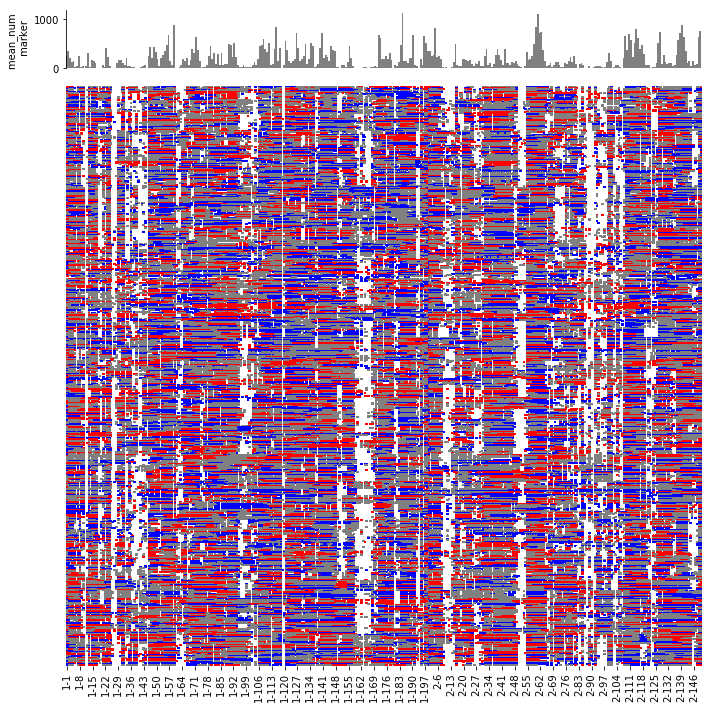

In [312]:
gs_kw = dict(width_ratios=[20], height_ratios=[1,10,])
fig, (ax,ax2) = plt.subplots(ncols=1, nrows=2, figsize=(10,10),gridspec_kw=gs_kw)
sns.heatmap(composite, cmap=["Red", "Grey", "Blue"], ax=ax2, center=0, cbar=False)
ax.bar(range(len(gt.density_matrix.mean(axis=0))),gt.density_matrix.mean(axis=0), width=1, color="Grey")
ax.set_xlim(0,348)
sns.despine(ax=ax,top=True, bottom=True)
ax.get_xaxis().set_visible(False)
ax.set_ylabel("mean_num \n marker")
ax2.get_yaxis().set_visible(False)
plt.tight_layout()

plt.show()

In [349]:
def remove_ambigous_sites(dataframe, jitter=0.2):
    df = copy.deepcopy(dataframe)
    df = df.fillna("NA")  # fill NaNs with "NA
    
    def remove_amb(x):
        """ remove ambiguous calls and format to 1/0/-1/NA only """
        if x=="NA":
            return x
        elif x >= 1.0-jitter:
            return int(1)
        elif 1.0-jitter>= x >0.0+jitter:
            return "NA"
        elif 0.0+jitter >= x >0.0-jitter:
            return int(0)
        elif 0.0-jitter >= x > -1.0+jitter:
            return "NA"
        elif x<= -1.0+jitter:
            return int(-1)
    df = df.applymap(remove_amb)
    df = df.replace("NA", np.nan)
    return df

In [273]:
len(gt.density_matrix.mean(axis=0))

348

In [343]:
import copy

In [350]:
composite_noamb = remove_ambigous_sites(dataframe=composite)

In [351]:
composite_noamb

,1-1,1-2,1-3,1-4,1-5,1-6,1-7,1-8,1-9,1-10,...,2-141,2-142,2-143,2-144,2-145,2-146,2-147,2-148,2-149,2-150
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
100002,-1.0,-1.0,-1.0,-1.0,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
100302,-1.0,-1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-1.0
100502,1.0,0.0,0.0,0.0,NaN,NaN,NaN,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0
100602,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.0
100902,1.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0
101002,-1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
101202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,-1.0,-1.0,...,-1.0,-1.0,NaN,-1.0,NaN,NaN,NaN,NaN,-1.0,-1.0
101302,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,...,-1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
101502,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,-1.0,-1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


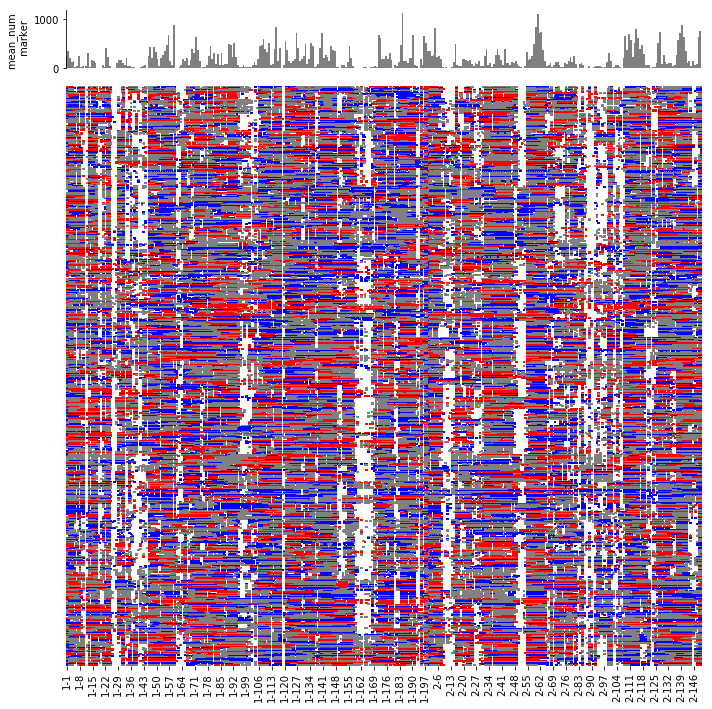

In [352]:
gs_kw = dict(width_ratios=[20], height_ratios=[1,10,])
fig, (ax,ax2) = plt.subplots(ncols=1, nrows=2, figsize=(10,10),gridspec_kw=gs_kw)
sns.heatmap(composite_noamb, cmap=["Red", "Grey", "Blue"], ax=ax2, center=0, cbar=False)
ax.bar(range(len(gt.density_matrix.mean(axis=0))),gt.density_matrix.mean(axis=0), width=1, color="Grey")
ax.set_xlim(0,348)
sns.despine(ax=ax,top=True, bottom=True)
ax.get_xaxis().set_visible(False)
ax.set_ylabel("mean_num \n marker")
ax2.get_yaxis().set_visible(False)
plt.tight_layout()

plt.show()

In [353]:
composite_gaps_filled = gt._fill_gaps(genotype_matrix=composite_noamb, thresh=3)

In [354]:
cgf = composite_gaps_filled.replace("NA", np.nan)

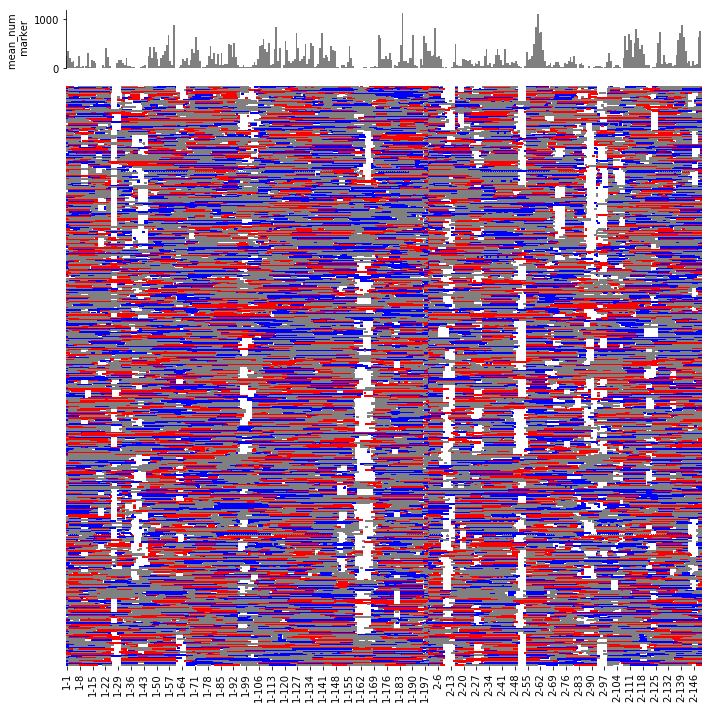

In [355]:
gs_kw = dict(width_ratios=[20], height_ratios=[1,10,])
fig, (ax,ax2) = plt.subplots(ncols=1, nrows=2, figsize=(10,10),gridspec_kw=gs_kw)
sns.heatmap(cgf, cmap=["Red", "Grey", "Blue"], ax=ax2, center=0, cbar=False)
ax.bar(range(len(gt.density_matrix.mean(axis=0))),gt.density_matrix.mean(axis=0), width=1, color="Grey")
ax.set_xlim(0,348)
sns.despine(ax=ax,top=True, bottom=True)
ax.get_xaxis().set_visible(False)
ax.set_ylabel("mean_num \n marker")
ax2.get_yaxis().set_visible(False)
plt.tight_layout()

plt.show()

0
1
2
3


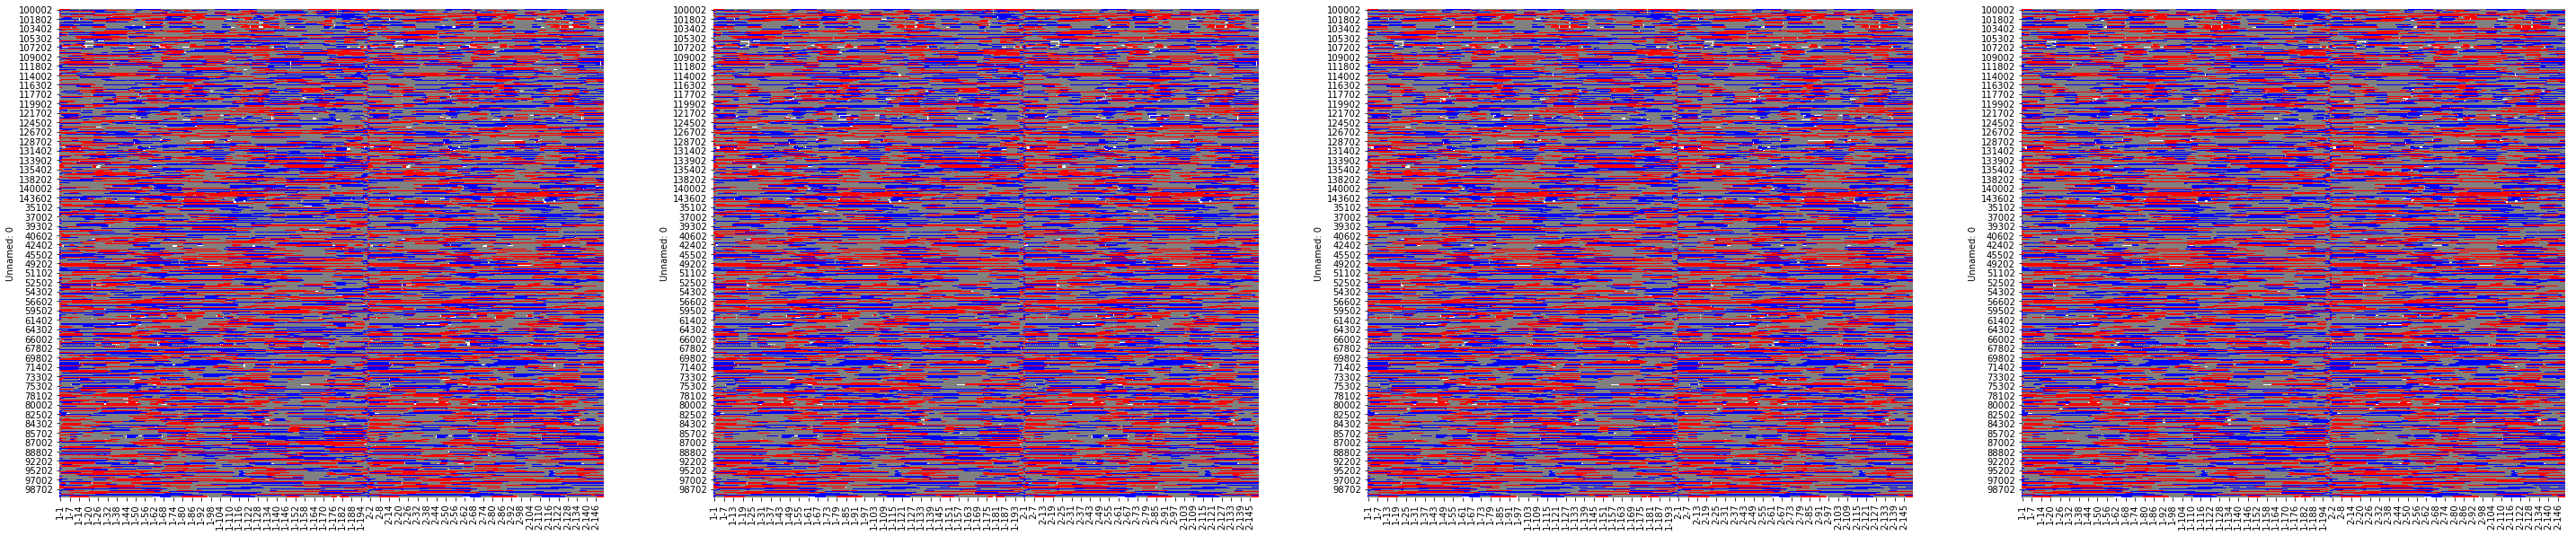

In [314]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(50,10))
for i, (key,item) in enumerate(ws_mt_dict.items()):
    #print(i)
    sns.heatmap(item, cmap=["Red", "Grey", "Blue"], ax=ax[i], center=0, cbar=False)
plt.show()

In [330]:
cgfm = cgf.mean(axis=1)
for i, col in enumerate(cgf):
    # using i allows for duplicate columns
    # inplace *may* not always work here, so IMO the next line is preferred
    # df.iloc[:, i].fillna(m, inplace=True)
    cgf.iloc[:, i] = cgf.iloc[:, i].fillna(cgfm)

In [338]:
import pandas as pd
        # get size in bp for chromosome
        a = [j.split("\t") for j in open(input.size_file).read().split("\n") if len(j.split("\t"))==3]
        header = a.pop(0)
        chr_size_dict = {int(i[2]):int(i[1]) for i in a}

        df = pd.read_csv(input.genotype, sep="\t", header=None)
        df.columns = ["chromosome", "position", "HIGH","OFHIGH", "LOW", "OFLOW"]

        new_positions = []
        for i, k in df.iterrows():
            new_positions.append(chr_size_dict[k["chromosome"]]-k["position"])
        df.position = new_positions
        df = df.sort_values(by="position", ascending=True)
        df.to_csv(output.genotype, index=False, header=False, sep="\t")


In [331]:
#ws_mt_dict["500"]

In [387]:
tiger_out = "/home/tilman/optimise_test/F2/stripes_data/with.fam.f2.call2.TIGER_OUT"

In [396]:
#!ls {tiger_out+"/100002.genotype"}

In [ ]:
all_vcf[i-2],"/",id_all[i-2],".genotype.",1,".rough_COs_windowsize",windowsize,".refined.breaks.txt"

In [392]:
all_sample_folders = os.listdir(tiger_out)

In [420]:
files_for_unflipping = []
for sample_folder in all_sample_folders:
    files = os.listdir(os.path.join(tiger_out,sample_folder))
    for f in files:
        if f.endswith(".refined.breaks.txt"):
            if "flipped" in f:
                files_for_unflipping.append(os.path.join(tiger_out,sample_folder,f))
                #print(os.path.join(tiger_out,sample_folder,f))

In [442]:
def unflip_flipped(recomb_file, size_file):
    """unflip the recombination breakpoints from a flipped genotype"""
    a = [j.split("\t") for j in open(size_file).read().split("\n") if len(j.split("\t"))==3]
    header = a.pop(0)
    chr_size_dict = {int(i[2]):int(i[1]) for i in a}
    datf = pd.read_csv(recomb_file, sep="\t", header=None)
    datf.columns = ["sample", "chr", "start", "stop", "type"]
    new_positions1 = []
    new_positions2 = []
    for i, k in datf.iterrows():
        new_positions1.append(chr_size_dict[k["chr"]]-k["start"])
        new_positions2.append(chr_size_dict[k["chr"]]-k["stop"])
    ## because flipping, start is now end. 
    datf.start = new_positions2
    datf.stop = new_positions1
    datf = datf.sort_values(by="start", ascending=True)
    return datf

In [446]:
test_flip = files_for_unflipping[3]
size_file = "/home/tilman/nas/stripes_AIL_gg6a/F3/stripes_data/input_aux/Index_fastq_contig_chr.txt"

In [447]:
unflip_flipped(recomb_file=test_flip, size_file=size_file)

,sample,chr,start,stop,type
13,87502.genotype,1,0,3194028,CL
12,87502.genotype,1,3212654,5413050,LL
11,87502.genotype,1,5413065,15035075,CL
10,87502.genotype,1,15035938,49935815,CC
9,87502.genotype,1,50277517,62344131,CL
8,87502.genotype,1,62347502,75694148,CC
7,87502.genotype,1,76004980,77324521,CL
6,87502.genotype,1,77328676,82125403,CC
5,87502.genotype,1,82130468,99517266,CL
4,87502.genotype,1,99741834,146835565,LL


In [412]:
new_positions = []
for i, k in df.iterrows():
    new_positions.append(chr_size_dict[k["chromosome"]]-k["position"])
df.position = new_positions
df = df.sort_values(by="position", ascending=True)
df.to_csv(output.genotype, index=False, header=False, sep="\t")

1	197608386
419	1765
398	2384
344	4675
323	5861
221	10869
103	21511
97	22289
2	149682049
3	110838418
